# Computer Price Prediction 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Computer_Data.csv")

print(df.describe())

        Unnamed: 0        price        speed           hd          ram  \
count  6259.000000  6259.000000  6259.000000  6259.000000  6259.000000   
mean   3130.000000  2219.576610    52.011024   416.601694     8.286947   
std    1806.961999   580.803956    21.157735   258.548445     5.631099   
min       1.000000   949.000000    25.000000    80.000000     2.000000   
25%    1565.500000  1794.000000    33.000000   214.000000     4.000000   
50%    3130.000000  2144.000000    50.000000   340.000000     8.000000   
75%    4694.500000  2595.000000    66.000000   528.000000     8.000000   
max    6259.000000  5399.000000   100.000000  2100.000000    32.000000   

            screen          ads        trend  
count  6259.000000  6259.000000  6259.000000  
mean     14.608723   221.301007    15.926985  
std       0.905115    74.835284     7.873984  
min      14.000000    39.000000     1.000000  
25%      14.000000   162.500000    10.000000  
50%      14.000000   246.000000    16.000000  
75% 

In [3]:
df1 =df.drop('Unnamed: 0',axis=1)

In [4]:
df1

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,no,no,yes,39,35
6255,2223,66,850,16,15,yes,yes,yes,39,35
6256,2654,100,1200,24,15,yes,no,yes,39,35
6257,2195,100,850,16,15,yes,no,yes,39,35


In [5]:
df1.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [6]:
df1.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [12]:
df2= df1[['cd','multi', 'premium']].replace({'no': 0, 'yes': 1})

In [17]:
df1.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [13]:
df2.head()

,cd,multi,premium
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,0
4,0,0,1


In [21]:
df3 =df.drop(['Unnamed: 0','cd', 'multi', 'premium'],axis=1)

In [22]:
df3


,price,speed,hd,ram,screen,ads,trend
0,1499,25,80,4,14,94,1
1,1795,33,85,2,14,94,1
2,1595,25,170,4,15,94,1
3,1849,25,170,8,14,94,1
4,3295,33,340,16,14,94,1
...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,39,35
6255,2223,66,850,16,15,39,35
6256,2654,100,1200,24,15,39,35
6257,2195,100,850,16,15,39,35


In [24]:
df_row = pd.concat([df3, df2], axis=1)

In [25]:
df_row

,price,speed,hd,ram,screen,ads,trend,cd,multi,premium
0,1499,25,80,4,14,94,1,0,0,1
1,1795,33,85,2,14,94,1,0,0,1
2,1595,25,170,4,15,94,1,0,0,1
3,1849,25,170,8,14,94,1,0,0,0
4,3295,33,340,16,14,94,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,39,35,0,0,1
6255,2223,66,850,16,15,39,35,1,1,1
6256,2654,100,1200,24,15,39,35,1,0,1
6257,2195,100,850,16,15,39,35,1,0,1


In [26]:
df_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
price      6259 non-null int64
speed      6259 non-null int64
hd         6259 non-null int64
ram        6259 non-null int64
screen     6259 non-null int64
ads        6259 non-null int64
trend      6259 non-null int64
cd         6259 non-null int64
multi      6259 non-null int64
premium    6259 non-null int64
dtypes: int64(10)
memory usage: 489.1 KB


In [28]:
df_row.shape

(6259, 10)

In [38]:
X = df_row.iloc[:,df_row.columns != 'price']
Y = df_row.iloc[:, 0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)

In [39]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

         Coefficient
speed       9.183157
hd          0.782669
ram        48.218806
screen    122.863237
ads         0.666664
trend     -51.748575
cd         61.195302
multi     102.907020
premium  -500.097520


In [41]:
y_pred = model.predict(X_test)

In [58]:
df_34 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df_34.head(18)

,Actual,Predicted
3449,2090,2034.513784
4130,2399,2383.831393
5137,2354,2226.493599
842,3495,2711.933946
4261,1798,1942.092792
4214,3195,3344.434397
2853,1490,1409.999489
2828,2799,2377.515153
3287,2244,1950.793228
1042,4594,3462.468335


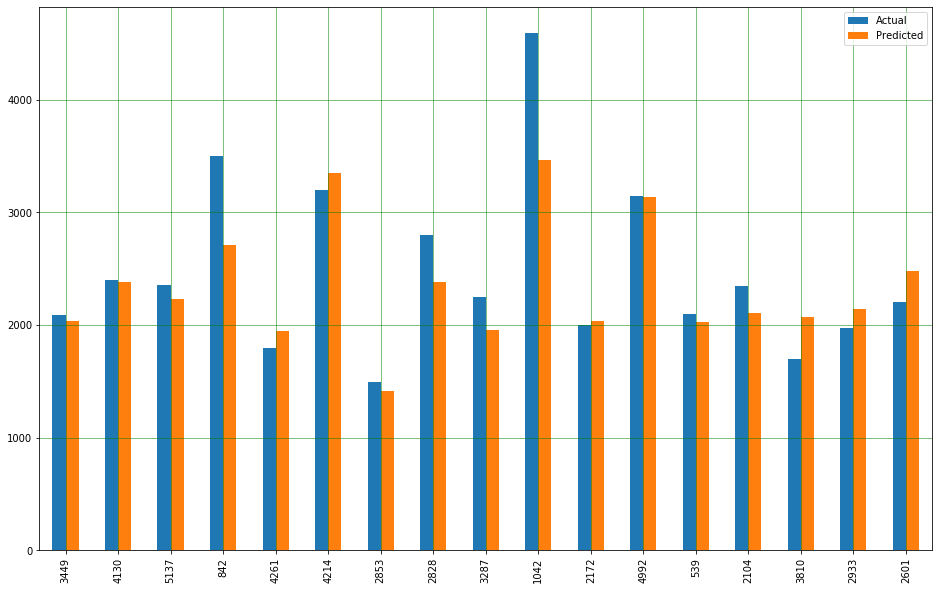

In [62]:
df_34.head(17).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [55]:
# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      
r2_value = r2_score(Y_test, y_pred) 
print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)


Intercept: 
 305.0137227411385
Root Mean Square Error 
 274.8766734818086
R^2 Value: 
 0.7842770001633773


In [ ]:
#  Here the R² value is 0.784277, which shows the model is almost accurate and can make good predictions. 
# R² value can range from 0 to 1. As the R² value close to 1, the model will make better predictions.